<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/Module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolation is a process that's used to estimmate the value of a function at a new point x*, based on a given data set of points (xi, yi).

We are given indepent (xi) and dependent (yi) data values which then form pairs (xi, yi), where i = 1,2, ...,n.

The goal is to find a function f(x) such that f(xi) = yi for every i. So f(x) must pass through each of the given points. Once we determine f(x), it can be used to estimate y* for any new x* that lies within the range of xi values. This is known as interpolating f(x*).

Unlike regression, interpolation guarantees that the function passes through all the given points. Interpolation is often used when there are reliable data points and there's no need for an explicit model to explain the data. Even though it doesn't require a pre-determined model, the underlying process is important.

If the data, for example, represents the postion of a car over time, we can expect a smoother curve due to constraints such as inertia or turning radius.

Suppose a car's coordinates are recorded at various times. The coordinates would be (xi, yi), where xi is time and yi is position. The function f(x) can estimate the car's positon at y* and a new time x* provided that x* is within the range of recorded times.

**Linear Interpolation**

For linear interpolation, the estimated point is assumed to lie on the straight line connecting the two closest known points (xi, yi) and (xi+1, yi+1).

The forumla below is used. The two nearest points are xi, xi+1 and yi, yi+1 are the corresponding y-values. The point we want to estimate is x, and y-hat is the interpolated y-value at x.


In [8]:
from sympy import symbols, Eq, init_printing, simplify

init_printing()

x, x_i, x_ip1, y_i, y_ip1 = symbols('x x_i x_i+1 y_i y_i+1')

y_hat = y_i + (y_ip1 - y_i) / (x_ip1 - x_i) * (x - x_i)

print("Linear Interpolation Equation:")
display(y_hat)

Linear Interpolation Equation:


     (x - xᵢ)⋅(-yᵢ + yᵢ₊₁)
yᵢ + ─────────────────────
          -xᵢ + xᵢ₊₁      

For example, let's say we're given the data:
x = [0, 1, 2]
y = [1, 3, 2]

We want to find y-hat at x = 1.5.

Since 1 < x < 2, the two nearest points would be (1, 3) = (xi, yi) and (2, 2) = (xi+1, yi+1).

Applying the formula, we get 2.5 as the interpolated value at x = 1.5.

In [14]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

2.5


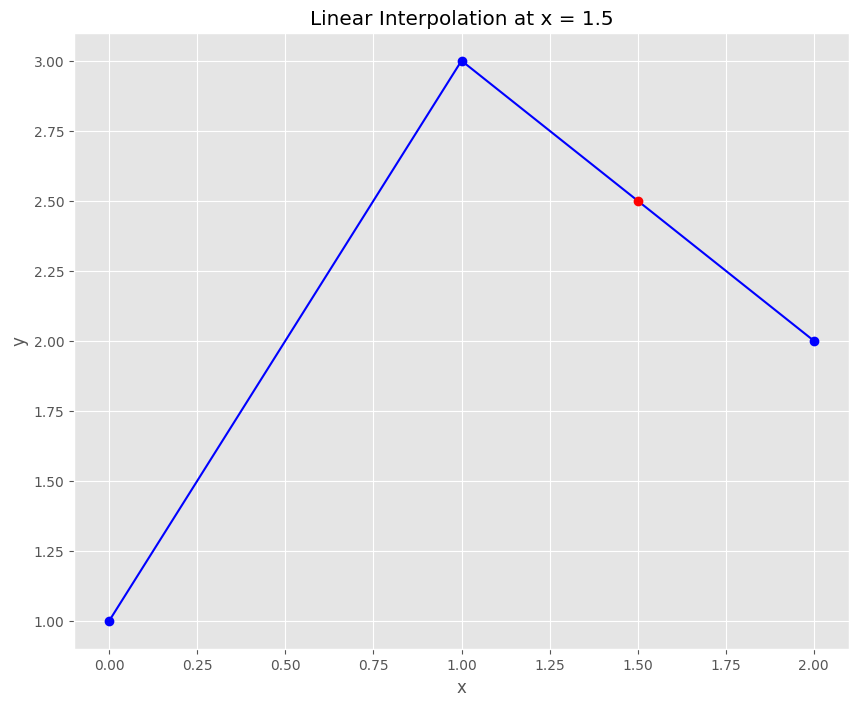

In [15]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Cubic Spine Interpolation**

Cubic spline interpolation is a method that's used to create a smooth curve which passes through a set of given points. Instead of using a single polynomial to connect each point, cubic spine uses separate cubic polynomials for each adjacent pair of points. These are functions are known as "pieces" of the overall curve.

To find the cubic functions which fit the data, we need to calculte the coefficients for each piecewise function. We know each cubic function must pass through the points it's connecting, so we use this requirement to form equations. The curve should also have a continuous first and second derivative at the points the functions meet. We also need equations based on how we want the curve to behave at the end. A common set of final constraints is to assume that the second derivative is zero at the endpoints, and therefore a "straight line".


We can use the CubicSpline function to perfrom cubic spline interpolation:

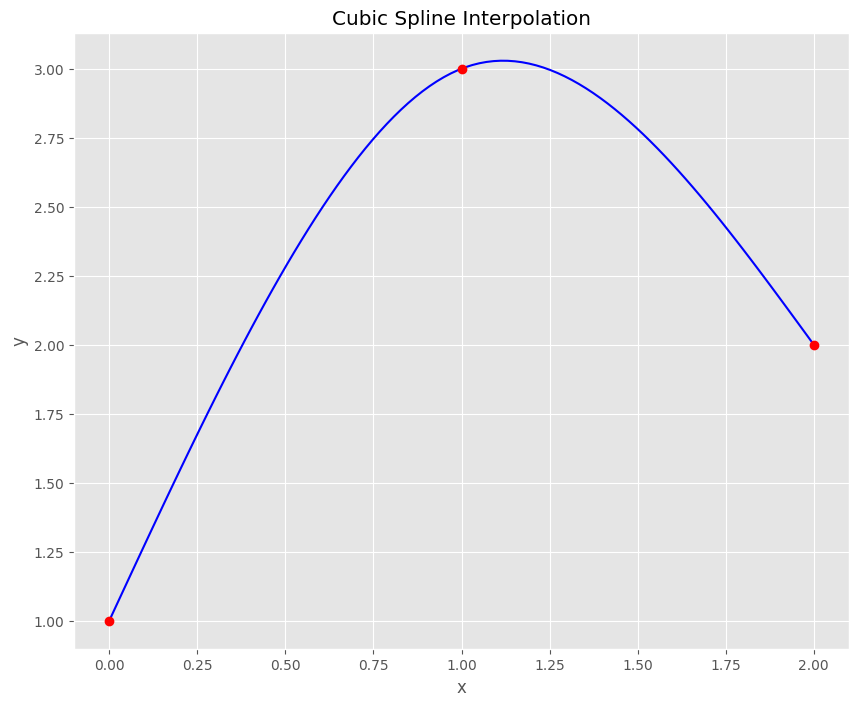

In [13]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
import numpy as np

x_data = [0, 1, 2]
y_data = [1, 3, 2]

n = len(x_data) - 1

A = np.zeros((4 * n, 4 * n))
b = np.zeros(4 * n)
row = 0

# Si(xi) = yi
for i in range(n):
    xi = x_data[i]
    A[row, 4 * i:4 * i + 4] = [xi**3, xi**2, xi, 1]
    b[row] = y_data[i]
    row += 1

# Si(xi+1) = yi+1
for i in range(n):
    xi1 = x_data[i + 1]
    A[row, 4 * i:4 * i + 4] = [xi1**3, xi1**2, xi1, 1]
    b[row] = y_data[i + 1]
    row += 1

# S'i(xi+1) = S'i+1(xi+1)
for i in range(n - 1):
    xi1 = x_data[i + 1]
    A[row, 4 * i:4 * i + 4] = [3 * xi1**2, 2 * xi1, 1, 0]
    A[row, 4 * (i + 1):4 * (i + 1) + 4] = [-3 * xi1**2, -2 * xi1, -1, 0]
    b[row] = 0
    row += 1

# S''i(xi+1) = S''i+1(xi+1)
for i in range(n - 1):
    xi1 = x_data[i + 1]
    A[row, 4 * i:4 * i + 4] = [6 * xi1, 2, 0, 0]
    A[row, 4 * (i + 1):4 * (i + 1) + 4] = [-6 * xi1, -2, 0, 0]
    b[row] = 0
    row += 1

# S''1(x1) = 0 and S''n-1(xn) = 0
A[row, 0:2] = [6 * x_data[0], 2]
b[row] = 0
row += 1
A[row, 4 * (n - 1):4 * (n - 1) + 2] = [6 * x_data[-1], 2]
b[row] = 0

coefficients = np.linalg.solve(A, b)
splines = coefficients.reshape(n, 4)
for i, spline in enumerate(splines):
    print(f"Spline {i + 1}: a{i + 1}={spline[0]:.3f}, b{i + 1}={spline[1]:.3f}, c{i + 1}={spline[2]:.3f}, d{i + 1}={spline[3]:.3f}")


Spline 1: a1=-0.750, b1=0.000, c1=2.750, d1=1.000
Spline 2: a2=0.750, b2=-4.500, c2=7.250, d2=-0.500


Lets try to find the cubic spline interpolation at x = 1.5 based on x = [0, 1, 2], y = [1, 3, 2].

We need to create the appropriate system of equations and find the coefficients by solving the system in matrix form:

In [17]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [18]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

So the cubic polynomials are

*   S1(x) = -.75x^3 + 2.75x + 1, for 0 <= x <= 1
*   S2(x) = .75x^3 - 4.5x^2 + 7.25x - .5, for 1 <= x <= 2

For x = 1.5, we evaluate S2(1.5) and get an estimated value of 2.7813.

